<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read-in data</a></span></li><li><span><a href="#Read-in-language-dataset" data-toc-modified-id="Read-in-language-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read-in language dataset</a></span></li><li><span><a href="#Main-language" data-toc-modified-id="Main-language-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Main language</a></span><ul class="toc-item"><li><span><a href="#Read-in-region-data---additional-column" data-toc-modified-id="Read-in-region-data---additional-column-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Read-in region data - additional column</a></span></li><li><span><a href="#Exploring-language-dataset" data-toc-modified-id="Exploring-language-dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exploring language dataset</a></span></li><li><span><a href="#Scatterplot---relationship-between-NR-rate-and-%-of-Non-English-speakers" data-toc-modified-id="Scatterplot---relationship-between-NR-rate-and-%-of-Non-English-speakers-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Scatterplot - relationship between NR rate and % of Non-English speakers</a></span></li><li><span><a href="#Read-in-urban-vs-rural-dataset" data-toc-modified-id="Read-in-urban-vs-rural-dataset-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Read-in urban vs rural dataset</a></span></li></ul></li><li><span><a href="#Religion" data-toc-modified-id="Religion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Religion</a></span></li><li><span><a href="#Total-numbers---table" data-toc-modified-id="Total-numbers---table-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Total numbers - table</a></span><ul class="toc-item"><li><span><a href="#Shannon-index" data-toc-modified-id="Shannon-index-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Shannon index</a></span></li><li><span><a href="#%-Non-response-per-religious-category" data-toc-modified-id="%-Non-response-per-religious-category-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>% Non-response per religious category</a></span></li><li><span><a href="#Total-number-of-atheists-/-total-number-of-respondents" data-toc-modified-id="Total-number-of-atheists-/-total-number-of-respondents-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Total number of atheists / total number of respondents</a></span></li><li><span><a href="#NR-rate-for-Atheists" data-toc-modified-id="NR-rate-for-Atheists-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>NR rate for Atheists</a></span></li><li><span><a href="#Total-number-of-Christians-/-total-number-of-respondents" data-toc-modified-id="Total-number-of-Christians-/-total-number-of-respondents-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Total number of Christians / total number of respondents</a></span></li><li><span><a href="#NR-rate-for-Atheists" data-toc-modified-id="NR-rate-for-Atheists-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>NR rate for Atheists</a></span></li></ul></li><li><span><a href="#Outputs" data-toc-modified-id="Outputs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Outputs</a></span></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Read-in data

In [2]:
# Let's also read in SO data

so = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/so_renamed.csv')
so.head()

,LA_code,LA_name,SO_code,SO_categories,Observation
0,E06000001,Hartlepool,-8,Does not apply,0
1,E06000001,Hartlepool,1,Straight or Heterosexual,68070
2,E06000001,Hartlepool,2,Gay or Lesbian,1121
3,E06000001,Hartlepool,3,Bisexual,784
4,E06000001,Hartlepool,4,All other sexual orientations,157


In [3]:

# Let's calculate the SO_category percentages for each local authority

so['Percentages'] = ''


for i in so.LA_code.unique():
    b = so[so.LA_code == i]
    percent = b['Observation'] / b['Observation'].sum() * 100
    so.loc[b.index, 'Percentages'] = percent

In [4]:
def top10(df, column_name, n):
    
    top_dfs = []
    
    for i in df[column_name].unique():
        if i != 'Does not apply' and i != 'Straight or Heterosexual':
            b = df[df[column_name] == i]
            top_df = b.sort_values(by = 'Percentages', ascending = False)[:n]
            top_dfs.append(top_df)
        
    result_df = pd.concat(top_dfs, ignore_index = True)
        
    return result_df

In [5]:
b = top10(so, 'SO_categories', n = 5)

b

,LA_code,LA_name,SO_code,SO_categories,Observation,Percentages
0,E09000001,City of London,2,Gay or Lesbian,607,7.583708
1,E06000043,Brighton and Hove,2,Gay or Lesbian,13726,5.831744
2,E09000022,Lambeth,2,Gay or Lesbian,14291,5.313746
3,E09000019,Islington,2,Gay or Lesbian,8420,4.585407
4,E09000028,Southwark,2,Gay or Lesbian,11596,4.527282
5,E07000148,Norwich,3,Bisexual,4700,3.891921
6,E07000008,Cambridge,3,Bisexual,4769,3.822294
7,E06000043,Brighton and Hove,3,Bisexual,8916,3.788127
8,E07000178,Oxford,3,Bisexual,4953,3.622812
9,E07000138,Lincoln,3,Bisexual,2974,3.415721


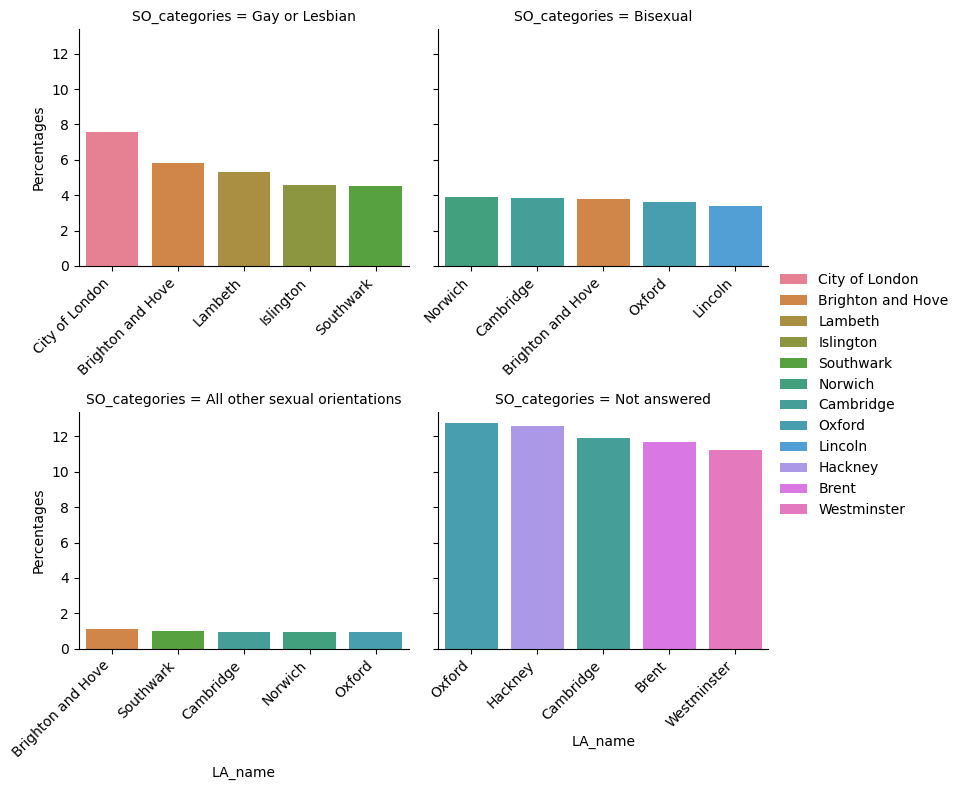

In [6]:
# Create a custom color palette
custom_palette = sns.color_palette("husl", n_colors=b['LA_name'].nunique())

# Create a color mapping dictionary
color_mapping = {LA_name: color for LA_name, color in zip(b['LA_name'].unique(), custom_palette)}
# Create a FacetGrid with subplots for each unique value in the 'SO_categories' column
g = sns.FacetGrid(b, col='SO_categories', col_wrap=2, height=4, aspect=1, sharex = False)

# Define a custom function to be used inside the FacetGrid
def custom_barplot(x, y, **kwargs):
    so_category = kwargs.pop('label')
    order = b[b['SO_categories'] == so_category]['LA_name'].unique()
    
    if len(order) > 0:
        sns.barplot(x=x, y=y, order=order, **kwargs)
    else:
        sns.barplot(x=x, y=y, **kwargs)

# Use the custom function to create bar plots for each SO_category with the correct ordering
g.map(custom_barplot, 'LA_name', 'Percentages', label='SO_categories', hue = b['LA_name'], dodge = False, palette = color_mapping)

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Customize the chart
g.set_axis_labels("LA_name", "Percentages")
g.fig.tight_layout()
g.add_legend()

# Read-in language dataset

In [7]:
lang = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/Language_2021.csv')

In [8]:
lang.head()

,Lower Tier Local Authorities Code,Lower Tier Local Authorities,Main language (detailed) (95 categories) Code,Main language (detailed) (95 categories),Observation
0,E06000001,Hartlepool,-8,Does not apply,2918
1,E06000001,Hartlepool,1,English (English or Welsh in Wales),87544
2,E06000001,Hartlepool,2,Welsh or Cymraeg (in England only),4
3,E06000001,Hartlepool,3,Other UK language: Gaelic (Irish),0
4,E06000001,Hartlepool,4,Other UK language: Gaelic (Scottish),0


In [9]:
lang = lang.rename(columns={'Lower Tier Local Authorities Code':'LA_code', 'Lower Tier Local Authorities':'LA_name', 'Main language (detailed) (95 categories)': 'ML_categories', 'Main language (detailed) (95 categories) Code': 'ML_code'})

In [10]:
lang.head()

,LA_code,LA_name,ML_code,ML_categories,Observation
0,E06000001,Hartlepool,-8,Does not apply,2918
1,E06000001,Hartlepool,1,English (English or Welsh in Wales),87544
2,E06000001,Hartlepool,2,Welsh or Cymraeg (in England only),4
3,E06000001,Hartlepool,3,Other UK language: Gaelic (Irish),0
4,E06000001,Hartlepool,4,Other UK language: Gaelic (Scottish),0


# Main language

In [11]:
# Let's calculate our non-response rate...
# Probably didn't need to do this.. but meh, will clean later!

so['Non-response_rate'] = ''

for i in so.LA_code.unique():
    b = so[so.LA_code == i]
#     print(b.index)
    percent = b['Observation'].where(b['SO_code'] == 5) / b['Observation'].sum() * 100
    so.loc[b.index, 'Non-response_rate'] = percent

In [12]:
# Let's go ahead and select only a subset of our dataframe where our SO_code == 5

not_ans = so[so['SO_code'] == 5]

## Read-in region data - additional column

In [13]:
# Incorporating region - adding it as another column
# Read-in region data

region = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/Local_Authority__to_Region.csv')

In [14]:
# Create a key-value dictionary using zip() and a dictionary comprehension
key_value_dict = {key: value for key, value in zip(region['LAD22NM'], region['RGN22NM'])}

# Create a new column titled 'region' and set it to empty
not_ans['region'] = ''


for key, value in key_value_dict.items():
#     Creates a boolean series where key = True
    matching_rows = not_ans['LA_name'] == key
# Use .loc to access the row in which key = True, i.e. where the 'LA_name' column matches the current key
# We then access the region column and set it's value to match the corresponding value for our key.
    not_ans.loc[matching_rows, 'region'] = value
    
    
# Manual matching for those that couldn't be filled in


not_ans.loc[not_ans['LA_name'] == 'Herefordshire', 'region'] = 'West Midlands'
not_ans.loc[not_ans['LA_name'] == 'Kingston upon Hull', 'region'] = 'Yorkshire and The Humber'
not_ans.loc[not_ans['LA_name'] == 'Bristol', 'region'] = 'South West'

# The rest of the LA_names that weren't filled in all belong to the Wales region
# So we subset the dataframe so we only have those rows where the region column is empty
b = not_ans[not_ans.region == '']

# Then we create a list from those unique values
la_names = b.LA_name.unique().tolist()

# We iterate through each value in the list
for i in la_names:
#     Again, we use the same method...
# Creates a boolean series where the rows in LA_name are set to True if they match i
    matching_rows = not_ans['LA_name'] == i
#     Use .loc to access the rows where LA_name matches i
# We then access the region column and set it's value to 'Wales'
    not_ans.loc[matching_rows, 'region'] = 'Wales'

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_12001/3960182255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_ans['region'] = ''


In [15]:
# Sorted not_ans dataframe values by non-response rate, and grabbed the highest 20 values by...
# setting ascending to False and slicing the dataframe 

top20 = not_ans.sort_values(by = 'Non-response_rate', ascending = False)[:20]

# Here we have it.. this can now be plotted
top20

,LA_code,LA_name,SO_code,SO_categories,Observation,Percentages,Non-response_rate,region
1121,E07000178,Oxford,5,Not answered,17411,12.735066,12.735066,South East
1727,E09000012,Hackney,5,Not answered,26384,12.595719,12.595719,London
359,E07000008,Cambridge,5,Not answered,14860,11.910105,11.910105,East of England
1685,E09000005,Brent,5,Not answered,32188,11.698644,11.698644,London
1853,E09000033,Westminster,5,Not answered,19885,11.2049,11.2049,London
1739,E09000014,Haringey,5,Not answered,23733,10.9875,10.9875,London
1775,E09000020,Kensington and Chelsea,5,Not answered,13521,10.984735,10.984735,London
1745,E09000015,Harrow,5,Not answered,22680,10.819527,10.819527,London
1805,E09000025,Newham,5,Not answered,29594,10.715747,10.715747,London
95,E06000016,Leicester,5,Not answered,30847,10.599834,10.599834,East Midlands


### Top 20 LAs by Non-Response - hued by region 

<Axes: xlabel='Non-response_rate', ylabel='LA_name'>

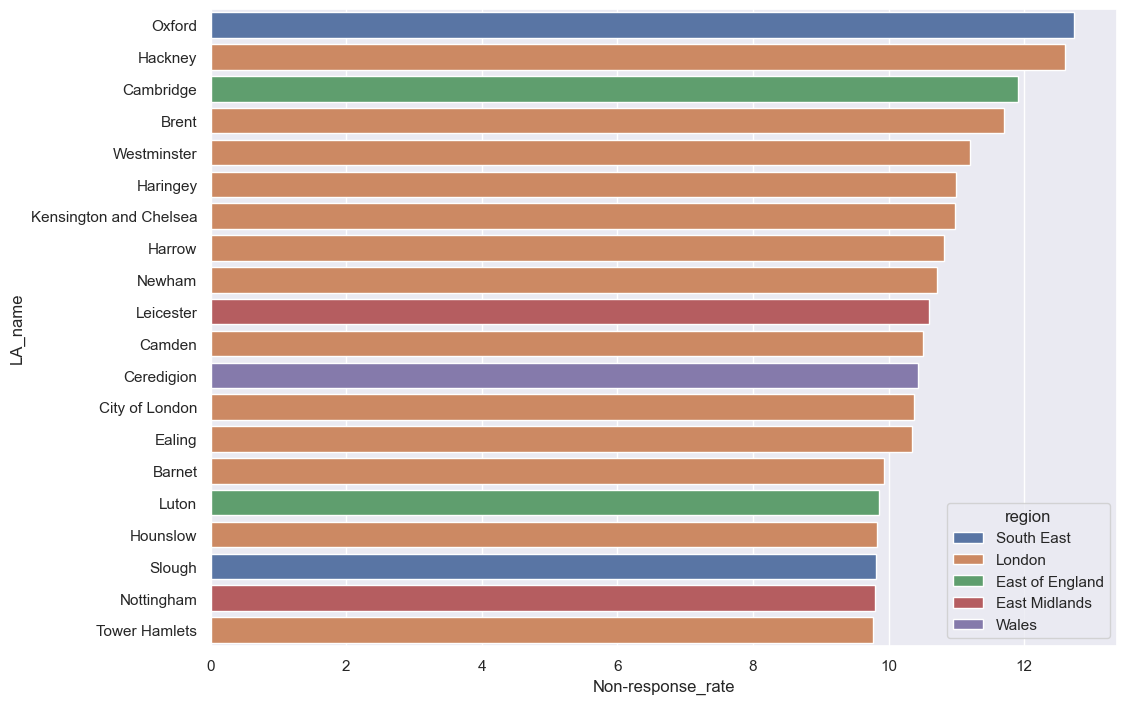

In [16]:
unique_hue_values = top20['region'].unique()
custom_palette = sns.color_palette("deep", n_colors=len(unique_hue_values))

# Create a color mapping dictionary
color_mapping = {hue_value: color for hue_value, color in zip(unique_hue_values, custom_palette)}



# Initially the graph was very small, so I set the size using figure.figsize
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Simply entered my x value and y value from my top20 dataset, and set the hue to region...

sns.barplot(x = 'Non-response_rate', y = 'LA_name', data = top20, dodge = False, hue = 'region', palette = color_mapping)

## Exploring language dataset

In [17]:
lang['Percentages'] = ''


for i in lang.LA_code.unique():
    b = lang[lang.LA_code == i]
    percent = b['Observation'] / b['Observation'].sum() * 100
    lang.loc[b.index, 'Percentages'] = percent
    
lang['Non-English'] = (lang['ML_code'] != 1) & (lang['ML_code'] != -8)

In [18]:
lang2 = lang[lang['Non-English'] == True]

In [19]:
# Aggregate the data by local authority, summing the 'Observation' column
la_agg = lang2.groupby('LA_name')['Observation'].sum().reset_index()

# Merge the aggregated data with the total number of observations for each local authority
la_totals = lang.groupby('LA_name')['Observation'].sum().reset_index()
la_agg = la_agg.merge(la_totals, on='LA_name', suffixes=('', '_total'))

In [20]:
# Calculate the percentage of Non-English speakers for each local authority
la_agg['Percentage'] = (la_agg['Observation'] / la_agg['Observation_total']) * 100

In [21]:
# Create a key-value dictionary using zip() and a dictionary comprehension
key_value_dict = {key: value for key, value in zip(region['LAD22NM'], region['RGN22NM'])}

la_agg['region'] = ''


for key, value in key_value_dict.items():
    matching_rows = la_agg['LA_name'] == key
#     print(matching_rows)
    la_agg.loc[matching_rows, 'region'] = value
    
    
# Manual matching for those that couldn't be filled in

# df.loc[df['LA_name'] == [['Kingston upon Hull', 'Herefordshire'], 'region']] = ['Yorkshire and The Humber', 'West Midlands']
la_agg.loc[la_agg['LA_name'] == 'Herefordshire', 'region'] = 'West Midlands'
la_agg.loc[la_agg['LA_name'] == 'Kingston upon Hull', 'region'] = 'Yorkshire and The Humber'
la_agg.loc[la_agg['LA_name'] == 'Bristol', 'region'] = 'South West'

b = la_agg[la_agg.region == '']
la_names = b.LA_name.unique().tolist()

for i in la_names:
    matching_rows = la_agg['LA_name'] == i
#     print(matching_rows)
    la_agg.loc[matching_rows, 'region'] = 'Wales'

In [22]:
# Sort the local authorities based on the percentage of Non-English speakers, in descending order
la_agg_sorted = la_agg.sort_values(by='Percentage', ascending=False)

In [23]:
top20_lang = la_agg_sorted[:30]

In [24]:
top20_lang

,LA_name,Observation,Observation_total,Percentage,region
184,Newham,116570,351029,33.208083,London
30,Brent,110404,339820,32.488965,London
85,Ealing,109501,367117,29.827276,London
126,Harrow,77406,261208,29.633855,London
155,Leicester,106800,368570,28.976856,East Midlands
138,Hounslow,78555,288181,27.258910,London
123,Haringey,69460,264238,26.286908,London
241,Slough,41438,158492,26.145168,South East
292,Tower Hamlets,80621,310304,25.981296,London
315,Westminster,52599,204223,25.755669,London


### Top 20 LAs by % of Non-English as Main Language

<Axes: xlabel='Percentage', ylabel='LA_name'>

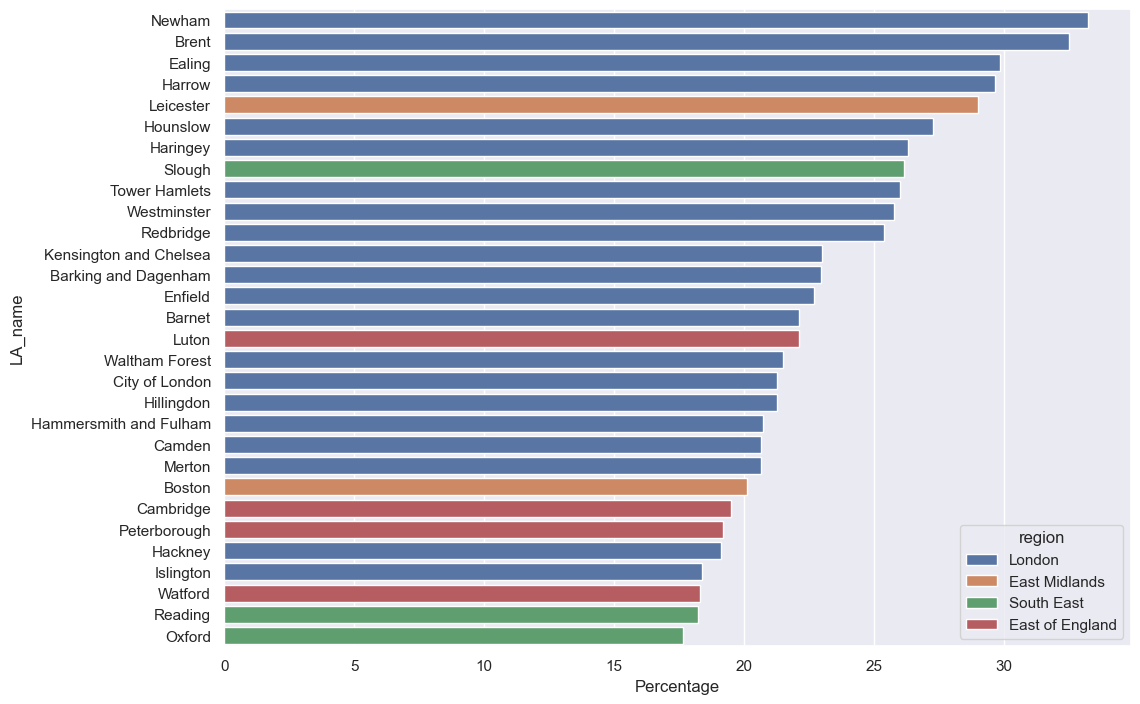

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Percentage', y = 'LA_name', hue = "region", data = top20_lang, dodge = False)
# plt.xticks(rotation=55)

In [26]:
merged_df = not_ans.merge(la_agg, on = ['LA_name'])

## Scatterplot - relationship between NR rate and % of Non-English speakers

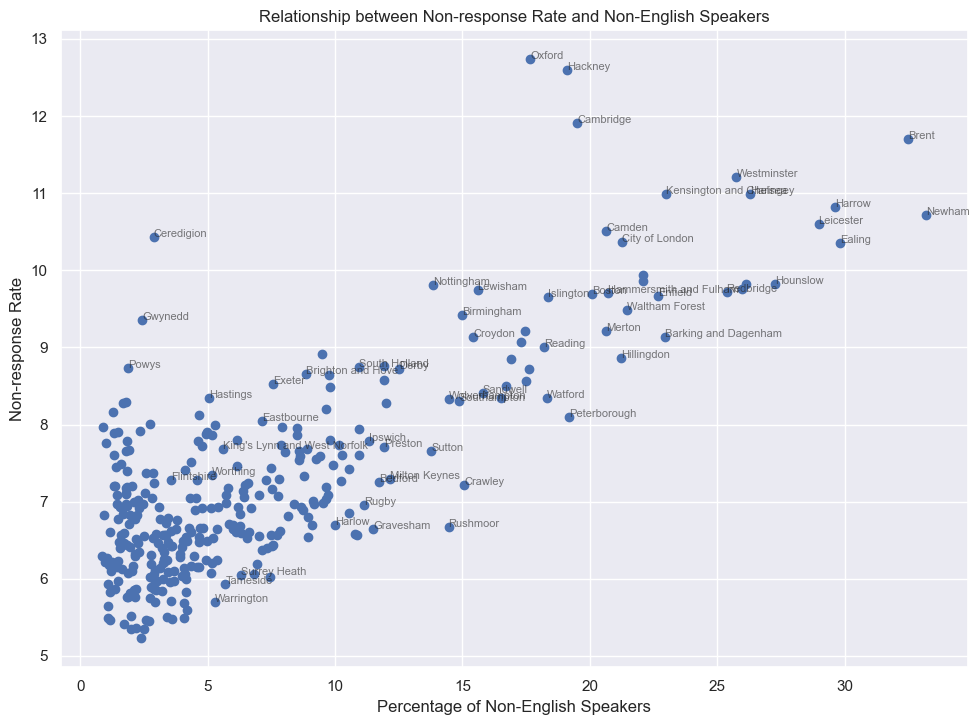

In [27]:
# Create a scatterplot to visualize the relationship between non-response rates and the percentage of non-English speakers
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

plt.scatter(merged_df['Percentage'], merged_df['Non-response_rate'])


# Find nearest neighbors
X = merged_df[['Percentage', 'Non-response_rate']].values
nbrs = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nbrs.kneighbors(X)
min_distance = 0.4

for i, row in merged_df.iterrows():
    if distances[i][1] >= min_distance:
        plt.annotate(row['LA_name'], (row['Percentage'], row['Non-response_rate']), fontsize=8, alpha=0.6)

plt.xlabel('Percentage of Non-English Speakers')
plt.ylabel('Non-response Rate')
plt.title('Relationship between Non-response Rate and Non-English Speakers')
plt.show()

In [28]:
from bokeh.models.annotations import LabelSet
from bokeh.models import ColumnDataSource, Label, LabelSet
from bokeh.palettes import Category10
from bokeh.io import show
from bokeh.models import CheckboxGroup, CustomJS
from bokeh.layouts import column
from bokeh.models import Button
from bokeh.plotting import figure, curdoc

LABELS = ["Labels"]
checkbox_group = CheckboxGroup(labels=LABELS, active=[0, 1])
# urban = rural_df.Urb_Rur.unique()


source=ColumnDataSource(merged_df)

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]

p1 = figure(title="Relationship between Non-response Rate and Non-English Speakers", x_axis_label="Percentage of Non-English Speakers", y_axis_label= "Non-response Rate", tooltips = tool)
output_notebook()

for region, color in zip(merged_df.region_x.unique(), Category10[10]):
    b = merged_df[merged_df.region_x == region]
    p1.circle(x = 'Percentage', y = 'Non-response_rate', size = 10, alpha = 0.5, color = color, legend_label = region, muted_color = color, muted_alpha = 0.1, source = b)

labels = LabelSet(x='Percentage', y='Non-response_rate', text='LA_name',x_offset=5, y_offset=5, text_font_size = "5pt",source=ColumnDataSource(merged_df))
tool = [
    ("Name","$LA_name"),
]

# p1.add_layout(labels)
p1.legend.location = "bottom_right"
p1.legend.click_policy="hide"
p1.legend.title = "Regions"

def callback():
    p1.add_layout(labels)


    
# add a button widget and configure with the call back
button = Button(label="Labels")
button.on_event('button_click', callback)
show(p1)

curdoc().add_root(column(button, p1))

Loading BokehJS ...

## Read-in urban vs rural dataset

In [29]:
# Read-in data from urban vs rural

rural = pd.read_excel('/Users/loucap/Documents/GitWork/InteractiveGender/Data/Rural_Urban_2011.xlsx')
rural.head()

,LAD11CD,LAD18CD,LAD18NM,Total Rural population 2011,Urban City and Town population 2011,Urban Minor Conurbation population 2011,Urban Major Conurbation population 2011,Total Urban population 2011,Total population 2011,Hub towns (rural related) population included in Urban population 2011,Rural including hub towns (rural & rural related) population 2011,Rural including hub towns (rural & rural related) population as % of Total population 2011,RUC11CD,RUC11,Broad RUC11
0,E06000001,E06000001,Hartlepool,3173,88855,0,0,88855,92028,0,3173,3.44,4,Urban with City and Town,Predominantly Urban
1,E06000002,E06000002,Middlesbrough,957,137455,0,0,137455,138412,0,957,0.69,4,Urban with City and Town,Predominantly Urban
2,E06000003,E06000003,Redcar and Cleveland,43880,91297,0,0,91297,135177,0,43880,32.46,3,Urban with Significant Rural (rural including ...,Urban with Significant Rural
3,E06000004,E06000004,Stockton-on-Tees,7536,184074,0,0,184074,191610,0,7536,3.93,4,Urban with City and Town,Predominantly Urban
4,E06000005,E06000005,Darlington,13201,92363,0,0,92363,105564,0,13201,12.50,4,Urban with City and Town,Predominantly Urban


In [30]:
rural = rural[['LAD18NM', 'Broad RUC11']]
rural = rural.rename(columns = {"LAD18NM": "LA_name", "Broad RUC11": "Urb_Rur"})

In [31]:
rural_df = merged_df.merge(rural, on=['LA_name'], how='left')

In [32]:
for i in rural_df.LA_name.unique():
    b = rural_df[rural_df.region_x == 'Wales']
    
    rural_df.loc[b.index, 'Urb_Rur'] = 'Welsh/not specified'

In [33]:
rural_df['Urb_Rur'] = rural_df['Urb_Rur'].fillna('Not specified')


In [34]:
rural_df[rural_df.Urb_Rur == 'Not specified']

,LA_code,LA_name,SO_code,SO_categories,Observation_x,Percentages,Non-response_rate,region_x,Observation_y,Observation_total,Percentage,region_y,Urb_Rur
54,E06000058,"Bournemouth, Christchurch and Poole",5,Not answered,25580,7.637896,7.637896,South West,32213,400195,8.049326,South West,Not specified
55,E06000059,Dorset,5,Not answered,23103,7.177029,7.177029,South West,6790,379574,1.788847,South West,Not specified
56,E06000060,Buckinghamshire,5,Not answered,31429,7.088262,7.088262,South East,38876,553074,7.029077,South East,Not specified
57,E06000061,North Northamptonshire,5,Not answered,20283,7.013752,7.013752,East Midlands,32849,359519,9.136930,East Midlands,Not specified
58,E06000062,West Northamptonshire,5,Not answered,25499,7.423246,7.423246,East Midlands,44949,425724,10.558249,East Midlands,Not specified
237,E07000244,East Suffolk,5,Not answered,14893,7.204466,7.204466,East of England,4973,246054,2.021101,East of England,Not specified
238,E07000245,West Suffolk,5,Not answered,10275,6.936615,6.936615,East of England,9769,179953,5.428640,East of England,Not specified
239,E07000246,Somerset West and Taunton,5,Not answered,9865,7.513672,7.513672,South West,6837,157440,4.342607,South West,Not specified


In [35]:
rural_df.Urb_Rur.unique()

array(['Predominantly Urban', 'Urban with Significant Rural',
       'Predominantly Rural', 'Not specified', 'Welsh/not specified'],
      dtype=object)

In [36]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]

# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

regions = rural_df.region_x.unique()
urban = rural_df.Urb_Rur.unique()


p2 = figure(title="Relationship between Non-response Rate and Non-English Speakers", y_axis_label="Non-response Rate", x_axis_label="Percentage of Non-English Speakers", tooltips = tool)
output_notebook()

for urban, color in zip(rural_df.Urb_Rur.unique(), Category10[10]):
    b = rural_df[rural_df.Urb_Rur == urban]
    p2.circle(x = 'Percentage', y = 'Non-response_rate', size = 10, fill_alpha = 0.5, color = color, legend_label = str(urban), muted_color = color, muted_alpha = 0.1, source = b)

# p2.scatter("Percentage", "Non-response_rate", source = rural_df, fill_alpha = 0.5, size = 10, color = factor_cmap('Urb_Rur', Category10[10], urban), legend_field = 'Urb_Rur')

p2.legend.location = "bottom_right"
p2.legend.click_policy="hide"
p2.legend.title = "Urban-Rural classification"
show(p2)

Loading BokehJS ...

# Religion

In [37]:
# Read-in dataset for religion + sexual orientation

rel = pd.read_excel('/Users/loucap/Documents/GitWork/InteractiveGender/Data/religion_so.xlsx')
rel.rename(columns={'Lower tier local authorities Code': 'LA_code', 'Lower tier local authorities': 'LA_name', 'Sexual orientation (6 categories) Code': 'SO_code', 'Sexual orientation (6 categories)': 'SO_categories', 'Religion (10 categories) Code': 'Religion_code', 'Religion (10 categories)': 'Religion_categories'}, inplace=True)
rel = rel[(rel.SO_code != -8) & (rel.Religion_code != -8) & (rel.Religion_code != 9)]

# Calculate the total number of survey respondents for each religion
total_by_religion = rel.groupby('Religion_categories')['Observation'].sum().reset_index()

# Calculate the percentage of respondents for each religion
total_respondents = rel['Observation'].sum()
total_by_religion['Percent_of_survey_respondents'] = ((total_by_religion['Observation'] / total_respondents) * 100).round(2)

# Calculate the total non-response for each religion
non_response_rel = rel[rel['SO_categories'] == 'Not answered']
non_response_by_religion = non_response_rel.groupby('Religion_categories')['Observation'].sum().reset_index()

# Merge the total_by_religion and non_response_by_religion DataFrames
# merged_rel = total_by_religion.merge(non_response_by_religion, on='Religion_categories', suffixes=('', '_non_response'))

total_by_religion.head(9)
# merged_rel.head()

,Religion_categories,Observation,Percent_of_survey_respondents
0,Buddhist,245514,0.54
1,Christian,23656564,51.78
2,Hindu,823132,1.80
3,Jewish,213617,0.47
4,Muslim,2664709,5.83
5,No religion,17355645,37.98
6,Other religion,314939,0.69
7,Sikh,416797,0.91


In [38]:
# Calculate the non-response rate for each religion
non_response_by_religion['Non_response_rate'] = ((non_response_by_religion['Observation'] / total_by_religion['Observation']) * 100).round(2)

total_non_response = non_response_by_religion['Observation'].sum()
non_response_by_religion['Contribution_to_overall_non_response_rate'] = ((non_response_by_religion['Observation'] / total_non_response) * 100).round(2)


In [39]:
non_response_by_religion.head(9)

,Religion_categories,Observation,Non_response_rate,Contribution_to_overall_non_response_rate
0,Buddhist,18331,7.47,0.82
1,Christian,1054454,4.46,47.25
2,Hindu,61226,7.44,2.74
3,Jewish,18054,8.45,0.81
4,Muslim,217981,8.18,9.77
5,No religion,800983,4.62,35.89
6,Other religion,31589,10.03,1.42
7,Sikh,28884,6.93,1.29


In [40]:
rel1 = pd.read_excel('/Users/loucap/Documents/GitWork/InteractiveGender/Data/religion_so.xlsx')

In [41]:
# These column names are too wordy, let's rename them.

rel1.rename(columns={'Lower tier local authorities Code': 'LA_code', 'Lower tier local authorities': 'LA_name', 'Sexual orientation (6 categories) Code': 'SO_code', 'Sexual orientation (6 categories)': 'SO_categories', 'Religion (10 categories) Code': 'Religion_code', 'Religion (10 categories)': 'Religion_categories'}, inplace=True)

In [42]:
rel1.SO_categories.unique()

array(['Does not apply', 'Straight or Heterosexual', 'Gay or Lesbian',
       'Bisexual', 'All other sexual orientations', 'Not answered'],
      dtype=object)

In [43]:
rel1.SO_code.unique()

array([-8,  1,  2,  3,  4,  5])

# Total numbers - table

In [44]:
# Nice. Lets now subset it, as we're only interested in non-response
# Let's also get rid of our empty 'Does not apply' category
# For now let's ignore our 'Non-response' for our rel1igious category

non_resp = rel1[(rel1.SO_code == 5) & (rel1.SO_code != -8) & (rel1.Religion_code != -8) & (rel1.Religion_code != 9)]

# Let's have a look...

non_resp.head(10)

,LA_code,LA_name,SO_code,SO_categories,Religion_code,Religion_categories,Observation
51,E06000001,Hartlepool,5,Not answered,1,No religion,1139
52,E06000001,Hartlepool,5,Not answered,2,Christian,1651
53,E06000001,Hartlepool,5,Not answered,3,Buddhist,14
54,E06000001,Hartlepool,5,Not answered,4,Hindu,23
55,E06000001,Hartlepool,5,Not answered,5,Jewish,4
56,E06000001,Hartlepool,5,Not answered,6,Muslim,87
57,E06000001,Hartlepool,5,Not answered,7,Sikh,15
58,E06000001,Hartlepool,5,Not answered,8,Other religion,22
111,E06000002,Middlesbrough,5,Not answered,1,No religion,1751
112,E06000002,Middlesbrough,5,Not answered,2,Christian,2549


In [45]:
# Created an empty column to hold percentages of religions within each LA

non_resp['Percentages'] = ''

for i in non_resp.LA_name.unique():
    
    b = non_resp[non_resp.LA_name == i]
    
    perc = b.Observation / b.Observation.sum() * 100
    
    non_resp.loc[b.index, 'Percentages'] = round(perc, 2)

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_12001/3865604128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_resp['Percentages'] = ''


In [46]:
sorted_df = non_resp.sort_values(by = ["LA_name", "Percentages"], ascending = [True, False])

sorted_df

,LA_code,LA_name,SO_code,SO_categories,Religion_code,Religion_categories,Observation,Percentages
13251,E07000223,Adur,5,Not answered,1,No religion,1057,48.84
13252,E07000223,Adur,5,Not answered,2,Christian,1023,47.27
13256,E07000223,Adur,5,Not answered,6,Muslim,27,1.25
13258,E07000223,Adur,5,Not answered,8,Other religion,20,0.92
13253,E07000223,Adur,5,Not answered,3,Buddhist,19,0.88
...,...,...,...,...,...,...,...,...
838,E06000014,York,5,Not answered,8,Other religion,111,1.55
834,E06000014,York,5,Not answered,4,Hindu,65,0.91
833,E06000014,York,5,Not answered,3,Buddhist,36,0.5
835,E06000014,York,5,Not answered,5,Jewish,15,0.21


## Shannon index

In [47]:
# Let's now calculate the proportions
# To get better precision and not lose valuable insights I opted to round to 4 decimal places
sorted_df['Proportions'] = (sorted_df['Percentages'].astype(float) / 100).round(4)

In [48]:
sorted_df.head()

,LA_code,LA_name,SO_code,SO_categories,Religion_code,Religion_categories,Observation,Percentages,Proportions
13251,E07000223,Adur,5,Not answered,1,No religion,1057,48.84,0.4884
13252,E07000223,Adur,5,Not answered,2,Christian,1023,47.27,0.4727
13256,E07000223,Adur,5,Not answered,6,Muslim,27,1.25,0.0125
13258,E07000223,Adur,5,Not answered,8,Other religion,20,0.92,0.0092
13253,E07000223,Adur,5,Not answered,3,Buddhist,19,0.88,0.0088


In [49]:
sorted_df['Calc'] = np.where(sorted_df['Proportions'] > 0, - sorted_df['Proportions'] * np.log(sorted_df['Proportions']), 0)

/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [50]:
# Created an empty column titled Shannon_idx
sorted_df['Shannon_idx'] = ''

for i in sorted_df.LA_code.unique():
    
    b = sorted_df[sorted_df.LA_code == i]
    summed = sum(b.Calc)
    
    sorted_df.loc[b.index, 'Shannon_idx'] = summed

In [51]:
sorted_df.head()

,LA_code,LA_name,SO_code,SO_categories,Religion_code,Religion_categories,Observation,Percentages,Proportions,Calc,Shannon_idx
13251,E07000223,Adur,5,Not answered,1,No religion,1057,48.84,0.4884,0.349997,0.891429
13252,E07000223,Adur,5,Not answered,2,Christian,1023,47.27,0.4727,0.354191,0.891429
13256,E07000223,Adur,5,Not answered,6,Muslim,27,1.25,0.0125,0.054775,0.891429
13258,E07000223,Adur,5,Not answered,8,Other religion,20,0.92,0.0092,0.043135,0.891429
13253,E07000223,Adur,5,Not answered,3,Buddhist,19,0.88,0.0088,0.041650,0.891429


In [52]:
unique_shannon_df = sorted_df[['LA_name', 'Shannon_idx']].drop_duplicates(subset=['LA_name'])
unique_shannon_df.sort_values(by = 'Shannon_idx', ascending = False).head()

,LA_name,Shannon_idx
17632,Hounslow,1.625498
17572,Hillingdon,1.6235
16732,Barnet,1.613314
17092,Ealing,1.613012
956,Leicester,1.586275


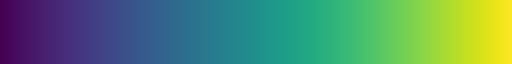

In [53]:
cmap = plt.get_cmap("viridis")
cmap

In [54]:
normalized_shannon = (sorted_df['Shannon_idx'] - sorted_df['Shannon_idx'].min()) / (sorted_df['Shannon_idx'].max() - sorted_df['Shannon_idx'].min())
normalized_shannon

13251    0.176281
13252    0.176281
13256    0.176281
13258    0.176281
13253    0.176281
           ...   
838      0.223817
834      0.223817
833      0.223817
835      0.223817
837      0.223817
Name: Shannon_idx, Length: 2648, dtype: object

In [55]:
from bokeh.models import LogColorMapper

color_map = LogColorMapper(palette="Viridis256", low=sorted_df.Shannon_idx.min(), high=sorted_df.Shannon_idx.max())

color_map

LogColorMapper(id='p2179', ...)

In [56]:
# Create a mapping between LA_code and Shannon_idx
la_code_to_shannon_idx = sorted_df.set_index('LA_code')['Shannon_idx'].to_dict()

In [57]:
merged_df

,LA_code,LA_name,SO_code,SO_categories,Observation_x,Percentages,Non-response_rate,region_x,Observation_y,Observation_total,Percentage,region_y
0,E06000001,Hartlepool,5,Not answered,4554,6.097528,6.097528,North East,1875,92337,2.030605,North East
1,E06000002,Middlesbrough,5,Not answered,8298,7.282908,7.282908,North East,10510,143923,7.302516,North East
2,E06000003,Redcar and Cleveland,5,Not answered,7046,6.27192,6.27192,North East,1460,136533,1.069339,North East
3,E06000004,Stockton-on-Tees,5,Not answered,9268,5.865452,5.865452,North East,5674,196603,2.886019,North East
4,E06000005,Darlington,5,Not answered,5010,5.686332,5.686332,North East,4403,107800,4.084416,North East
...,...,...,...,...,...,...,...,...,...,...,...,...
326,W06000020,Torfaen,5,Not answered,5233,6.966837,6.966837,Wales,1318,92273,1.428370,Wales
327,W06000021,Monmouthshire,5,Not answered,5423,6.931237,6.931237,Wales,1457,92955,1.567425,Wales
328,W06000022,Newport,5,Not answered,8721,6.844133,6.844133,Wales,10035,159590,6.287988,Wales
329,W06000023,Powys,5,Not answered,9832,8.736837,8.736837,Wales,2496,133173,1.874254,Wales


In [58]:
merged_df['Shannon_idx'] = merged_df['LA_code'].map(la_code_to_shannon_idx)

In [59]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10
from bokeh.models import ColorBar, BasicTicker, PrintfTickFormatter

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
    ("Shannon_idx", "@Shannon_idx")
]


p2 = figure(title="Relationship between Non-response Rate and Non-English Speakers", x_axis_label="Non-response Rate", y_axis_label="Percentage of Non-English Speakers", tooltips = tool)
output_notebook()

p2.scatter("Percentage", "Non-response_rate", source = merged_df, fill_alpha = 0.5, size = 10,  color={'field': 'Shannon_idx', 'transform': color_map})

color_bar = ColorBar(color_mapper=color_map,
                     title='Shannon Index',
                     ticker=BasicTicker(desired_num_ticks=5),
                     formatter=PrintfTickFormatter(format='%.2f'))

# Add the color bar to the plot
p2.add_layout(color_bar, 'right')


show(p2)

Loading BokehJS ...

## % Non-response per religious category

In [60]:
# Get rid of categories which are N/A and have 0 counts
# Also got rid of 'Not answered' category for rel1igion...is this wise?
# Will artificially inflate numbers of other rel1igious groups?

rel1 = rel1[(rel1.SO_code != -8) & (rel1.Religion_code != -8) & (rel1.Religion_code != 9)]


In [61]:
# Let's calc the % of each rel1igious group and their SO answers for each LA

rel1['Group_Percentages'] = ''

for i in rel1.LA_name.unique():
    
    b = rel1[rel1.LA_name == i]
    
    perc = b.Observation / b.Observation.sum() * 100
    
    rel1.loc[b.index, 'Group_Percentages'] = round(perc, 2)

In [62]:
rel1.head()

,LA_code,LA_name,SO_code,SO_categories,Religion_code,Religion_categories,Observation,Group_Percentages
11,E06000001,Hartlepool,1,Straight or Heterosexual,1,No religion,25028,35.3
12,E06000001,Hartlepool,1,Straight or Heterosexual,2,Christian,39649,55.92
13,E06000001,Hartlepool,1,Straight or Heterosexual,3,Buddhist,139,0.2
14,E06000001,Hartlepool,1,Straight or Heterosexual,4,Hindu,144,0.2
15,E06000001,Hartlepool,1,Straight or Heterosexual,5,Jewish,15,0.02


In [63]:
# Created a column which holds the total amount of people in each LA e.g. in Hartlepool there's 70898 people
# This will help me with next calculation

rel1['Total_LA_counts'] = ''

for i in rel1.LA_name.unique():
    
    b = rel1[rel1.LA_name == i]
    
    tot = b.Observation.sum()
    
    rel1.loc[b.index, 'Total_LA_counts'] = tot

In [64]:
rel1.head()

,LA_code,LA_name,SO_code,SO_categories,Religion_code,Religion_categories,Observation,Group_Percentages,Total_LA_counts
11,E06000001,Hartlepool,1,Straight or Heterosexual,1,No religion,25028,35.3,70898
12,E06000001,Hartlepool,1,Straight or Heterosexual,2,Christian,39649,55.92,70898
13,E06000001,Hartlepool,1,Straight or Heterosexual,3,Buddhist,139,0.2,70898
14,E06000001,Hartlepool,1,Straight or Heterosexual,4,Hindu,144,0.2,70898
15,E06000001,Hartlepool,1,Straight or Heterosexual,5,Jewish,15,0.02,70898


### ATHEISTS

In [65]:
# First, we subset our dataframe to only get data where rel1igion_category == No rel1igion

atheist = rel1[(rel1.Religion_categories == 'No religion')]
atheist.head(10)

,LA_code,LA_name,SO_code,SO_categories,Religion_code,Religion_categories,Observation,Group_Percentages,Total_LA_counts
11,E06000001,Hartlepool,1,Straight or Heterosexual,1,No religion,25028,35.3,70898
21,E06000001,Hartlepool,2,Gay or Lesbian,1,No religion,677,0.95,70898
31,E06000001,Hartlepool,3,Bisexual,1,No religion,546,0.77,70898
41,E06000001,Hartlepool,4,All other sexual orientations,1,No religion,89,0.13,70898
51,E06000001,Hartlepool,5,Not answered,1,No religion,1139,1.61,70898
71,E06000002,Middlesbrough,1,Straight or Heterosexual,1,No religion,34825,32.32,107747
81,E06000002,Middlesbrough,2,Gay or Lesbian,1,No religion,1096,1.02,107747
91,E06000002,Middlesbrough,3,Bisexual,1,No religion,892,0.83,107747
101,E06000002,Middlesbrough,4,All other sexual orientations,1,No religion,193,0.18,107747
111,E06000002,Middlesbrough,5,Not answered,1,No religion,1751,1.63,107747


In [66]:
# So, whilst we have the % of atheists for each SO category for each individual LA...
# We now want to know the total % of atheists in each LA

atheist['No religion_%'] = ''

for i in atheist.LA_code.unique():
    
    v = atheist[atheist.LA_code == i]
    
    perc = v.Group_Percentages.sum()
    
    atheist.loc[v.index, 'No religion_%'] = perc

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_12001/4121512775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atheist['No religion_%'] = ''


In [67]:
# Now we have...
# e.g. Hartlepool, our total % of atheists is 38.76% and out of that number...
# our non-response rate for atheists in this LA is 1.61%

atheist.head()

,LA_code,LA_name,SO_code,SO_categories,Religion_code,Religion_categories,Observation,Group_Percentages,Total_LA_counts,No religion_%
11,E06000001,Hartlepool,1,Straight or Heterosexual,1,No religion,25028,35.3,70898,38.76
21,E06000001,Hartlepool,2,Gay or Lesbian,1,No religion,677,0.95,70898,38.76
31,E06000001,Hartlepool,3,Bisexual,1,No religion,546,0.77,70898,38.76
41,E06000001,Hartlepool,4,All other sexual orientations,1,No religion,89,0.13,70898,38.76
51,E06000001,Hartlepool,5,Not answered,1,No religion,1139,1.61,70898,38.76


## Total number of atheists / total number of respondents

In [68]:
atheist.Observation.sum() / rel.Observation.sum() * 100

37.9848909576492

In [69]:
rel.Observation.sum()

45690917

In [70]:
# In terms of my scatterplot, I want to subset my dataframe again so that I'm only looking at non-response for GI

x = atheist[atheist.SO_categories == 'Not answered']

## NR rate for Atheists

In [71]:
 atheist.Observation.sum()

17355645

In [72]:
x.Observation.sum()

800983

In [73]:
x.Observation.sum() / atheist.Observation.sum() * 100

4.615115139771526

In [74]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Atheists in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Atheists in given LA", tooltips = tool)
output_notebook()

p2.scatter("No religion_%", "Group_Percentages", source = x, fill_alpha = 0.5, size = 10)

show(p2)

Loading BokehJS ...

In [75]:
from scipy.stats import pearsonr


correlation, _ = pearsonr(x['No religion_%'], x.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 0.75


In [76]:
from scipy.stats import spearmanr

correlation_coefficient, p_value = spearmanr(x['No religion_%'], x.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Spearman's rank correlation coefficient: 0.7707032457226604
P-value: 2.2944030622433956e-66


### CHRISTIAN

In [77]:
def subset_rel(religion):
    a = rel1[(rel1.Religion_categories == religion)]
    
    a[religion+'_%'] = ''

    for i in a.LA_code.unique():
    
        v = a[a.LA_code == i]
    
        perc = v.Group_Percentages.sum()
    
        a.loc[v.index, religion+'_%'] = perc
        
        x = a[a.SO_categories == 'Not answered']
        
    return a,x

In [78]:
christian, b = subset_rel('Christian')

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_12001/2696143460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[religion+'_%'] = ''


## Total number of Christians / total number of respondents

In [79]:
christian.Observation.sum() / rel.Observation.sum() * 100

51.775200747229476

## NR rate for Atheists

In [80]:
b.Observation.sum() 

1054454

In [81]:
b.head()

,LA_code,LA_name,SO_code,SO_categories,Religion_code,Religion_categories,Observation,Group_Percentages,Total_LA_counts,Christian_%
52,E06000001,Hartlepool,5,Not answered,2,Christian,1651,2.33,70898,59.05
112,E06000002,Middlesbrough,5,Not answered,2,Christian,2549,2.37,107747,52.44
172,E06000003,Redcar and Cleveland,5,Not answered,2,Christian,2639,2.48,106453,59.93
232,E06000004,Stockton-on-Tees,5,Not answered,2,Christian,3061,2.04,150094,57.05
292,E06000005,Darlington,5,Not answered,2,Christian,1807,2.16,83761,57.56


In [82]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Christians in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Christians in given LA", tooltips = tool)
output_notebook()

p2.scatter("Christian_%", "Group_Percentages", source = b, fill_alpha = 0.5, size = 10)

show(p2)

Loading BokehJS ...

In [83]:
from scipy.stats import pearsonr


correlation, _ = pearsonr(b['Christian_%'], b.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 0.37


In [84]:
from scipy.stats import spearmanr

correlation_coefficient, p_value = spearmanr(b['Christian_%'], b.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Spearman's rank correlation coefficient: 0.3987524497293173
P-value: 4.6160184257033035e-14


### MUSLIMS

In [85]:
muslim, c = subset_rel('Muslim')

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_12001/2696143460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[religion+'_%'] = ''


In [86]:
c.head()

,LA_code,LA_name,SO_code,SO_categories,Religion_code,Religion_categories,Observation,Group_Percentages,Total_LA_counts,Muslim_%
56,E06000001,Hartlepool,5,Not answered,6,Muslim,87,0.12,70898,1.11
116,E06000002,Middlesbrough,5,Not answered,6,Muslim,873,0.81,107747,9.18
176,E06000003,Redcar and Cleveland,5,Not answered,6,Muslim,66,0.06,106453,0.61
236,E06000004,Stockton-on-Tees,5,Not answered,6,Muslim,415,0.28,150094,2.99
296,E06000005,Darlington,5,Not answered,6,Muslim,108,0.13,83761,1.44


In [87]:
muslim.Observation.sum() / rel.Observation.sum() * 100

5.832032217694383

In [88]:
c.Observation.sum()

217981

In [89]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Muslims in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Muslims in given LA", tooltips = tool)
output_notebook()

p2.scatter("Muslim_%", "Group_Percentages", source = c, fill_alpha = 0.5, size = 10)

show(p2)

Loading BokehJS ...

In [90]:
correlation, _ = pearsonr(c['Muslim_%'], c.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 0.99


In [91]:
correlation_coefficient, p_value = spearmanr(c['Muslim_%'], c.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Spearman's rank correlation coefficient: 0.976681605550739Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

P-value: 6.625418458708777e-222


### OTHER RELIGION

In [92]:
other = rel1[(rel1.Religion_categories == 'Other religion')]
other.head(10)

,LA_code,LA_name,SO_code,SO_categories,Religion_code,Religion_categories,Observation,Group_Percentages,Total_LA_counts
18,E06000001,Hartlepool,1,Straight or Heterosexual,8,Other religion,175,0.25,70898
28,E06000001,Hartlepool,2,Gay or Lesbian,8,Other religion,18,0.03,70898
38,E06000001,Hartlepool,3,Bisexual,8,Other religion,40,0.06,70898
48,E06000001,Hartlepool,4,All other sexual orientations,8,Other religion,17,0.02,70898
58,E06000001,Hartlepool,5,Not answered,8,Other religion,22,0.03,70898
78,E06000002,Middlesbrough,1,Straight or Heterosexual,8,Other religion,272,0.25,107747
88,E06000002,Middlesbrough,2,Gay or Lesbian,8,Other religion,30,0.03,107747
98,E06000002,Middlesbrough,3,Bisexual,8,Other religion,56,0.05,107747
108,E06000002,Middlesbrough,4,All other sexual orientations,8,Other religion,35,0.03,107747
118,E06000002,Middlesbrough,5,Not answered,8,Other religion,41,0.04,107747


In [93]:
other['Other_%'] = ''

for i in other.LA_code.unique():
    
    v = other[other.LA_code == i]
    
    perc = v.Group_Percentages.sum()
    
    other.loc[v.index, 'Other_%'] = perc

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_12001/3748813376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other['Other_%'] = ''


In [94]:
d = other[other.SO_categories == 'Not answered']

In [95]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Other religions in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Other religions in given LA", tooltips = tool)
output_notebook()

p2.scatter("Other_%", "Group_Percentages", source = d, fill_alpha = 0.5, size = 10)

show(p2)


Loading BokehJS ...

In [96]:
correlation, _ = pearsonr(d['Other_%'], d.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 0.95


In [97]:
correlation_coefficient, p_value = spearmanr(d['Other_%'], d.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Spearman's rank correlation coefficient: 0.8511265914546569
P-value: 4.307051633796853e-94


### BUDDHIST

In [98]:
buddhist, e = subset_rel('Buddhist')

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_12001/2696143460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[religion+'_%'] = ''


In [99]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Buddhists in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Buddhists in given LA", tooltips = tool)
output_notebook()

p2.scatter("Buddhist_%", "Group_Percentages", source = e, fill_alpha = 0.5, size = 10)

show(p2)


Loading BokehJS ...

In [100]:
correlation, _ = pearsonr(e['Buddhist_%'], e.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 0.96


In [101]:
correlation_coefficient, p_value = spearmanr(e['Buddhist_%'], e.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Spearman's rank correlation coefficient: 0.8373663272490126
P-value: 2.653767485509972e-88


### JEWISH

In [102]:
jewish, f = subset_rel('Jewish')

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_12001/2696143460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[religion+'_%'] = ''


In [103]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Jewish people in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Jewish people in given LA", tooltips = tool)
output_notebook()

p2.scatter("Jewish_%", "Group_Percentages", source = f, fill_alpha = 0.5, size = 10)

show(p2)

Loading BokehJS ...

In [104]:
correlation, _ = pearsonr(f['Jewish_%'], f.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 0.56


In [105]:
correlation_coefficient, p_value = spearmanr(f['Jewish_%'], f.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Spearman's rank correlation coefficient: 0.8153594598556378
P-value: 4.376820218143245e-80
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### HINDU

In [106]:
hindu, g = subset_rel('Hindu')

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_12001/2696143460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[religion+'_%'] = ''


In [107]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Hindus in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Hindus in given LA", tooltips = tool)
output_notebook()

p2.scatter("Hindu_%", "Group_Percentages", source = g, fill_alpha = 0.5, size = 10)

show(p2)

Loading BokehJS ...

In [108]:
correlation, _ = pearsonr(g["Hindu_%"], g["Group_Percentages"])

print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 0.99


In [109]:
correlation_coefficient, p_value = spearmanr(g["Hindu_%"], g["Group_Percentages"])

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Spearman's rank correlation coefficient: 0.9558513720516854
P-value: 4.743798309647403e-177
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### SIKH

In [110]:
sikh, h = subset_rel('Sikh')

/var/folders/dm/468m4xf52c71yhldz5ck50pw0000gn/T/ipykernel_12001/2696143460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[religion+'_%'] = ''


In [111]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Sikhs in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Sikhs in given LA", tooltips = tool)
output_notebook()

p2.scatter("Sikh_%", "Group_Percentages", source = h, fill_alpha = 0.5, size = 10)

show(p2)

Loading BokehJS ...

In [112]:
correlation, _ = pearsonr(h["Sikh_%"], h["Group_Percentages"])

print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 0.98


In [113]:
correlation_coefficient, p_value = spearmanr(h["Sikh_%"], h["Group_Percentages"])

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Spearman's rank correlation coefficient: 0.8935545588692415Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

P-value: 1.8457151552883846e-116


In [114]:
# List of DataFrames and their corresponding suffixes
dataframes = [(x, '_Atheist'), (b, '_Christian'), (c, '_Muslim'), (d, '_Other'), (e, '_Buddhist'), (f, '_Jewish'), (g, '_Hindu'), (h, '_Sikh')]

# Merge the DataFrames one by one
merged_df2 = dataframes[0][0]  # Initialize with the first DataFrame
for df, suffix in dataframes[1:]:
    merged_df2 = merged_df2.merge(df, on=['LA_code', 'LA_name', 'SO_code', 'SO_categories'], suffixes=('', suffix))
    merged_df2 = merged_df2.rename(columns={'Total_counts': f'Total_counts{suffix}', 'Total': f'Total{suffix}'})

In [115]:
merged_df2 = merged_df2.rename(columns = {'Group_Percentages': 'Group_Percentages_No religion'})

In [116]:
merged_df2.columns

Index(['LA_code', 'LA_name', 'SO_code', 'SO_categories', 'Religion_code',
       'Religion_categories', 'Observation', 'Group_Percentages_No religion',
       'Total_LA_counts', 'No religion_%', 'Religion_code_Christian',
       'Religion_categories_Christian', 'Observation_Christian',
       'Group_Percentages_Christian', 'Total_LA_counts_Christian',
       'Christian_%', 'Religion_code_Muslim', 'Religion_categories_Muslim',
       'Observation_Muslim', 'Group_Percentages_Muslim',
       'Total_LA_counts_Muslim', 'Muslim_%', 'Religion_code_Other',
       'Religion_categories_Other', 'Observation_Other',
       'Group_Percentages_Other', 'Total_LA_counts_Other', 'Other_%',
       'Religion_code_Buddhist', 'Religion_categories_Buddhist',
       'Observation_Buddhist', 'Group_Percentages_Buddhist',
       'Total_LA_counts_Buddhist', 'Buddhist_%', 'Religion_code_Jewish',
       'Religion_categories_Jewish', 'Observation_Jewish',
       'Group_Percentages_Jewish', 'Total_LA_counts_Jewish',

In [135]:
cols = ["No religion_%", "Christian_%", "Muslim_%", "Other_%", "Buddhist_%", "Jewish_%", "Hindu_%", "Sikh_%"
       ,"Group_Percentages_No religion", "Group_Percentages_Christian", "Group_Percentages_Muslim",
       "Group_Percentages_Other", "Group_Percentages_Buddhist", "Group_Percentages_Jewish", "Group_Percentages_Hindu",
       "Group_Percentages_Sikh"]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


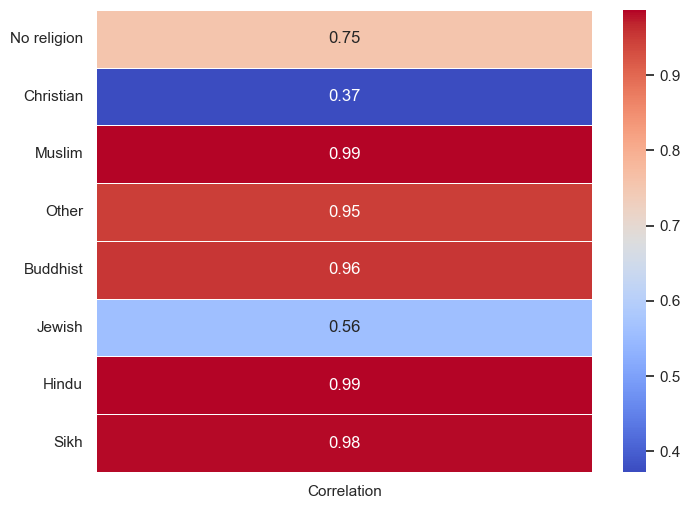

In [145]:
# List of religions
religions = ["No religion", "Christian", "Muslim", "Other", "Buddhist", "Jewish", "Hindu", "Sikh"]

# Preparing the DataFrame for correlation
correlation_values = []

for religion in religions:
    non_response = pd.to_numeric(merged_df2[f"{religion}_%"], errors = 'coerce')
    percentage = pd.to_numeric(merged_df2[f"Group_Percentages_{religion}"], errors = 'coerce')
    correlation = non_response.corr(percentage)
    correlation_values.append(correlation)


    
# Create a DataFrame for the correlation values
corr_df = pd.DataFrame(correlation_values, index=religions, columns=["Correlation"])

# Display the DataFrame
print(corr_df)

# Display a heatmap of the DataFrame
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')

plt.show()

In [148]:
import pandas as pd

religions = ["No religion", "Christian", "Muslim", "Other", "Buddhist", "Jewish", "Hindu", "Sikh"]
non_response_cols = [f"{religion}_%" for religion in religions]
group_percentage_cols = [f"Group_Percentages_{religion}" for religion in religions]

# Converting columns to numeric
for col in non_response_cols + group_percentage_cols:
    merged_df2[col] = pd.to_numeric(merged_df2[col], errors='coerce')

df_subset = merged_df2[non_response_cols + group_percentage_cols]

corr_matrix = df_subset.corr()


In [149]:
corr_submatrix = corr_matrix.loc[non_response_cols, group_percentage_cols]

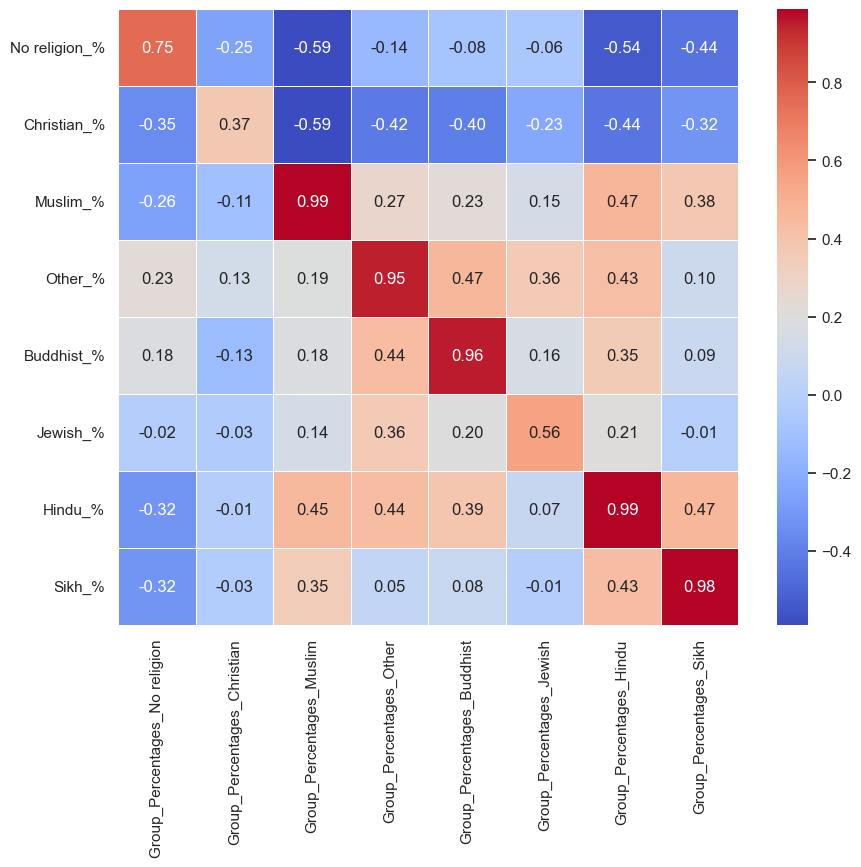

In [150]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_submatrix, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')
plt.show()

In [141]:
df_correlation

,No religion_percentage,No religion_non-response,Christian_percentage,Christian_non-response,Muslim_percentage,Muslim_non-response,Other_percentage,Other_non-response,Buddhist_percentage,Buddhist_non-response,Jewish_percentage,Jewish_non-response,Hindu_percentage,Hindu_non-response,Sikh_percentage,Sikh_non-response
0,38.76,1.61,59.05,2.33,1.11,0.12,0.39,0.03,0.23,0.02,0.03,0.01,0.23,0.03,0.19,0.02
1,35.98,1.63,52.44,2.37,9.18,0.81,0.40,0.04,0.34,0.03,0.03,0.00,1.20,0.08,0.41,0.03
2,38.58,1.71,59.93,2.48,0.61,0.06,0.45,0.04,0.23,0.02,0.02,0.00,0.10,0.01,0.04,0.00
3,38.48,1.50,57.05,2.04,2.99,0.28,0.34,0.02,0.31,0.01,0.03,0.00,0.41,0.02,0.40,0.02
4,39.32,1.50,57.56,2.16,1.44,0.13,0.46,0.03,0.38,0.03,0.03,0.00,0.41,0.03,0.40,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,50.32,2.12,47.93,2.43,0.36,0.04,0.65,0.04,0.33,0.03,0.02,0.00,0.32,0.02,0.06,0.01
327,43.34,1.98,54.74,2.52,0.40,0.03,0.65,0.06,0.43,0.03,0.10,0.01,0.22,0.02,0.11,0.01
328,43.65,1.98,48.28,2.09,6.29,0.46,0.56,0.06,0.36,0.02,0.06,0.00,0.48,0.03,0.27,0.01
329,42.47,2.43,55.51,3.29,0.28,0.03,0.84,0.10,0.53,0.06,0.07,0.01,0.23,0.02,0.05,0.00


In [142]:
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

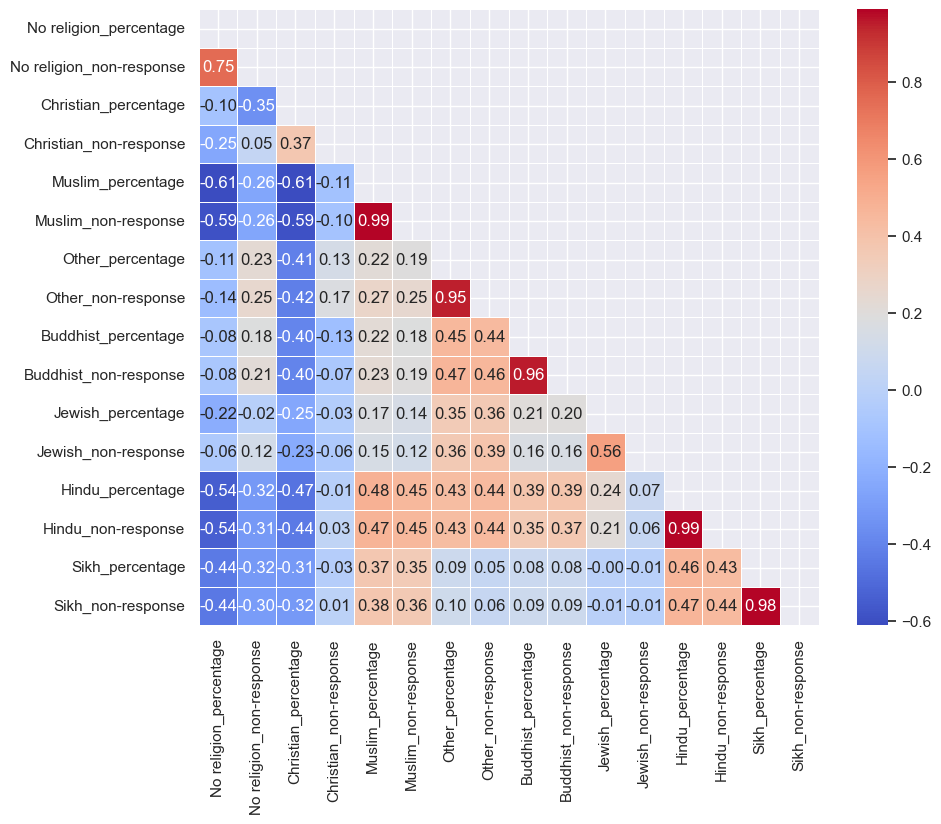

In [143]:
# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')

plt.show()

In [123]:
df_subset.head()

,No religion_%,Christian_%,Muslim_%,Other_%,Buddhist_%,Jewish_%,Hindu_%,Sikh_%,Group_Percentages_No religion,Group_Percentages_Christian,Group_Percentages_Muslim,Group_Percentages_Other,Group_Percentages_Buddhist,Group_Percentages_Jewish,Group_Percentages_Hindu,Group_Percentages_Sikh
0,38.76,59.05,1.11,0.39,0.23,0.03,0.23,0.19,1.61,2.33,0.12,0.03,0.02,0.01,0.03,0.02
1,35.98,52.44,9.18,0.4,0.34,0.03,1.2,0.41,1.63,2.37,0.81,0.04,0.03,0.0,0.08,0.03
2,38.58,59.93,0.61,0.45,0.23,0.02,0.1,0.04,1.71,2.48,0.06,0.04,0.02,0.0,0.01,0.0
3,38.48,57.05,2.99,0.34,0.31,0.03,0.41,0.4,1.5,2.04,0.28,0.02,0.01,0.0,0.02,0.02
4,39.32,57.56,1.44,0.46,0.38,0.03,0.41,0.4,1.5,2.16,0.13,0.03,0.03,0.0,0.03,0.04


In [129]:
df_subset = df_subset.apply(pd.to_numeric, errors='coerce')

In [130]:
corr_matrix = df_subset.corr()

In [131]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

In [133]:
corr_matrix

,No religion_%,Christian_%,Muslim_%,Other_%,Buddhist_%,Jewish_%,Hindu_%,Sikh_%,Group_Percentages_No religion,Group_Percentages_Christian,Group_Percentages_Muslim,Group_Percentages_Other,Group_Percentages_Buddhist,Group_Percentages_Jewish,Group_Percentages_Hindu,Group_Percentages_Sikh
No religion_%,1.000000,-0.104492,-0.606181,-0.108155,-0.083194,-0.218240,-0.544708,-0.438181,0.754959,-0.251558,-0.590221,-0.141075,-0.080498,-0.059579,-0.538331,-0.443197
Christian_%,-0.104492,1.000000,-0.611536,-0.412740,-0.399127,-0.250592,-0.466665,-0.314977,-0.353865,0.372248,-0.589474,-0.421386,-0.402404,-0.230816,-0.442200,-0.317121
Muslim_%,-0.606181,-0.611536,1.000000,0.216741,0.221967,0.173552,0.484265,0.369276,-0.258915,-0.108104,0.986798,0.272873,0.226309,0.145548,0.473120,0.380028
Other_%,-0.108155,-0.412740,0.216741,1.000000,0.451428,0.348211,0.430922,0.091937,0.227991,0.133420,0.193583,0.946440,0.467620,0.361426,0.427763,0.102985
Buddhist_%,-0.083194,-0.399127,0.221967,0.451428,1.000000,0.205167,0.385114,0.080845,0.182188,-0.129672,0.181667,0.442674,0.955300,0.158484,0.353869,0.093472
Jewish_%,-0.218240,-0.250592,0.173552,0.348211,0.205167,1.000000,0.242741,-0.004002,-0.015446,-0.032996,0.142380,0.359731,0.198959,0.558919,0.208542,-0.005022
Hindu_%,-0.544708,-0.466665,0.484265,0.430922,0.385114,0.242741,1.000000,0.463216,-0.317287,-0.014925,0.453181,0.437592,0.386190,0.073310,0.987121,0.465409
Sikh_%,-0.438181,-0.314977,0.369276,0.091937,0.080845,-0.004002,0.463216,1.000000,-0.316007,-0.028233,0.348502,0.051369,0.077774,-0.011853,0.432815,0.982726
Group_Percentages_No religion,0.754959,-0.353865,-0.258915,0.227991,0.182188,-0.015446,-0.317287,-0.316007,1.000000,0.046411,-0.257943,0.254588,0.214178,0.123736,-0.314663,-0.301841
Group_Percentages_Christian,-0.251558,0.372248,-0.108104,0.133420,-0.129672,-0.032996,-0.014925,-0.028233,0.046411,1.000000,-0.103675,0.173114,-0.069238,-0.061678,0.025981,0.007433


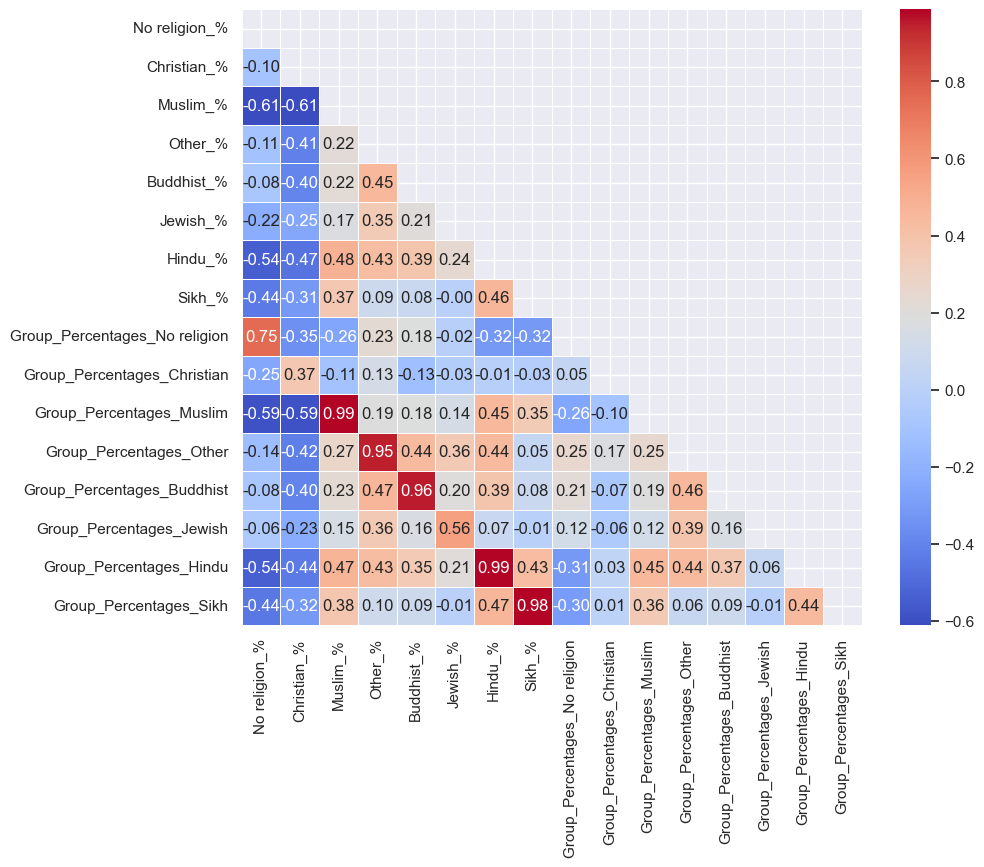

In [134]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')

plt.show()

# Outputs

In [117]:
# Dfs for scatterplots - will be imported into SO_outputs notebook

non_response_by_religion.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/nr_totals_SO.csv', index = False)
total_by_religion.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/gen_totals_SO.csv', index = False)
merged_df.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/cleaned_lang_SO.csv', index = False)
merged_df2.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/cleaned_religion_SO.csv', index = False)
rural_df.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/urban_rural_SO.csv', index = False)

In [118]:
merged_df.head()

,LA_code,LA_name,SO_code,SO_categories,Observation_x,Percentages,Non-response_rate,region_x,Observation_y,Observation_total,Percentage,region_y,Shannon_idx
0,E06000001,Hartlepool,5,Not answered,4554,6.097528,6.097528,North East,1875,92337,2.030605,North East,0.931876
1,E06000002,Middlesbrough,5,Not answered,8298,7.282908,7.282908,North East,10510,143923,7.302516,North East,1.181237
2,E06000003,Redcar and Cleveland,5,Not answered,7046,6.27192,6.27192,North East,1460,136533,1.069339,North East,0.831589
3,E06000004,Stockton-on-Tees,5,Not answered,9268,5.865452,5.865452,North East,5674,196603,2.886019,North East,1.001650
4,E06000005,Darlington,5,Not answered,5010,5.686332,5.686332,North East,4403,107800,4.084416,North East,0.966864


In [119]:
merged_df2

,LA_code,LA_name,SO_code,SO_categories,Religion_code,Religion_categories,Observation,Group_Percentages_No religion,Total_LA_counts,No religion_%,...,Observation_Hindu,Group_Percentages_Hindu,Total_LA_counts_Hindu,Hindu_%,Religion_code_Sikh,Religion_categories_Sikh,Observation_Sikh,Group_Percentages_Sikh,Total_LA_counts_Sikh,Sikh_%
0,E06000001,Hartlepool,5,Not answered,1,No religion,1139,1.61,70898,38.76,...,23,0.03,70898,0.23,7,Sikh,15,0.02,70898,0.19
1,E06000002,Middlesbrough,5,Not answered,1,No religion,1751,1.63,107747,35.98,...,86,0.08,107747,1.2,7,Sikh,33,0.03,107747,0.41
2,E06000003,Redcar and Cleveland,5,Not answered,1,No religion,1824,1.71,106453,38.58,...,9,0.01,106453,0.1,7,Sikh,4,0.0,106453,0.04
3,E06000004,Stockton-on-Tees,5,Not answered,1,No religion,2249,1.5,150094,38.48,...,26,0.02,150094,0.41,7,Sikh,25,0.02,150094,0.4
4,E06000005,Darlington,5,Not answered,1,No religion,1256,1.5,83761,39.32,...,21,0.03,83761,0.41,7,Sikh,30,0.04,83761,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,W06000020,Torfaen,5,Not answered,1,No religion,1495,2.12,70598,50.32,...,12,0.02,70598,0.32,7,Sikh,7,0.01,70598,0.06
327,W06000021,Monmouthshire,5,Not answered,1,No religion,1458,1.98,73676,43.34,...,14,0.02,73676,0.22,7,Sikh,6,0.01,73676,0.11
328,W06000022,Newport,5,Not answered,1,No religion,2386,1.98,120275,43.65,...,42,0.03,120275,0.48,7,Sikh,11,0.01,120275,0.27
329,W06000023,Powys,5,Not answered,1,No religion,2541,2.43,104686,42.47,...,25,0.02,104686,0.23,7,Sikh,3,0.0,104686,0.05
